<a href="https://colab.research.google.com/github/sarithamiryala/DeepLearningLab/blob/main/EmailSpamClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataScience2024/NLP/spam.csv')

In [ ]:
df.sample(5)

,Category,Message
4097,ham,"Hey , is * rite u put »10 evey mnth is that all?"
690,spam,<Forwarded from 448712404000>Please CALL 08712...
273,spam,HMV BONUS SPECIAL 500 pounds of genuine HMV vo...
2833,ham,Its normally hot mail. Com you see!
853,ham,No da if you run that it activate the full ver...


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<Axes: xlabel='Category'>

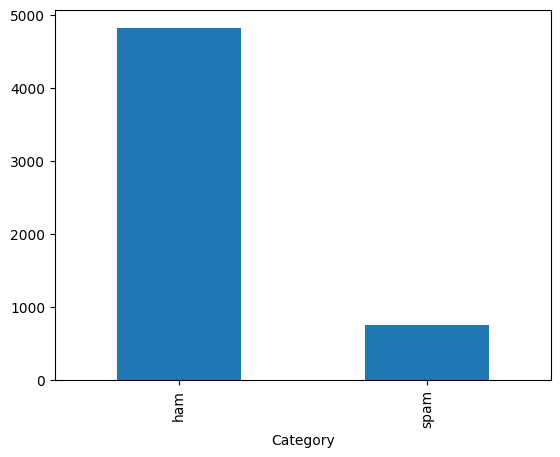

In [ ]:
df['Category'].value_counts().plot(kind='bar')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
df['Category'] =encoder.fit_transform(df['Category'])

In [ ]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Checking duplicated values
df.duplicated().sum()

415

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(5157, 2)

<Axes: xlabel='Category'>

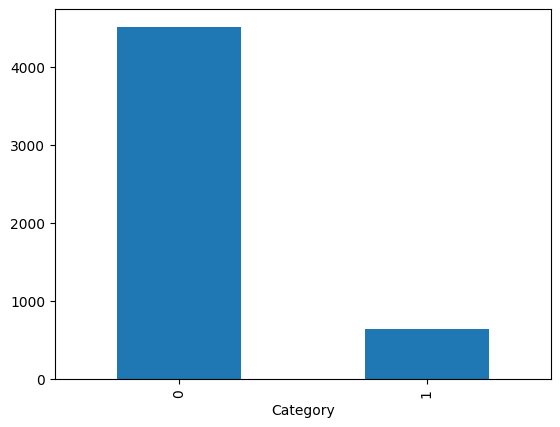

In [ ]:
df['Category'].value_counts().plot(kind='bar')

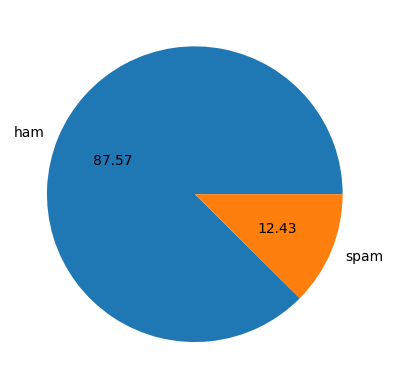

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [ ]:
# Data is imbalance

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['Message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5157, dtype: object

In [ ]:
df['num_characters'] = df['Message'].apply(len)

In [ ]:
df.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# Number of word in message
df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sent'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,Category,Message,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df.describe()

,Category,num_characters,num_words,num_sent
count,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.124297,79.103936,18.560403,1.969750
std,0.329952,58.382922,13.405970,1.455526
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,118.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [ ]:
#ham messages
df[df['Category'] == 0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#spam messages
df[df['Category'] == 1][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: ylabel='Frequency'>

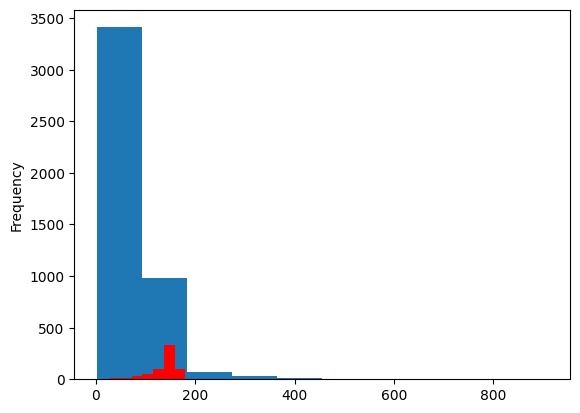

In [ ]:
df[df['Category'] == 0]['num_characters'].plot(kind='hist')
df[df['Category']==1]['num_characters'].plot(kind='hist',color ='red')

<Axes: ylabel='Frequency'>

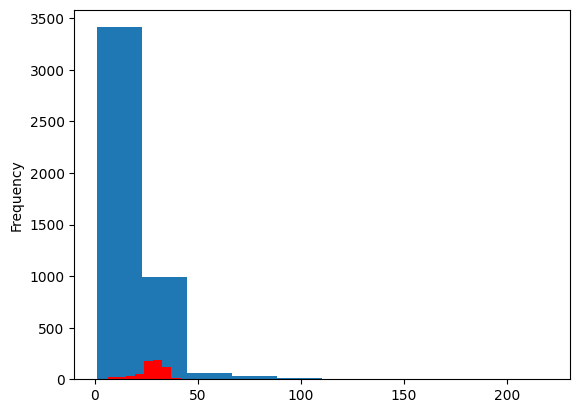

In [ ]:
df[df['Category'] == 0]['num_words'].plot(kind='hist')
df[df['Category']==1]['num_words'].plot(kind='hist',color ='red')

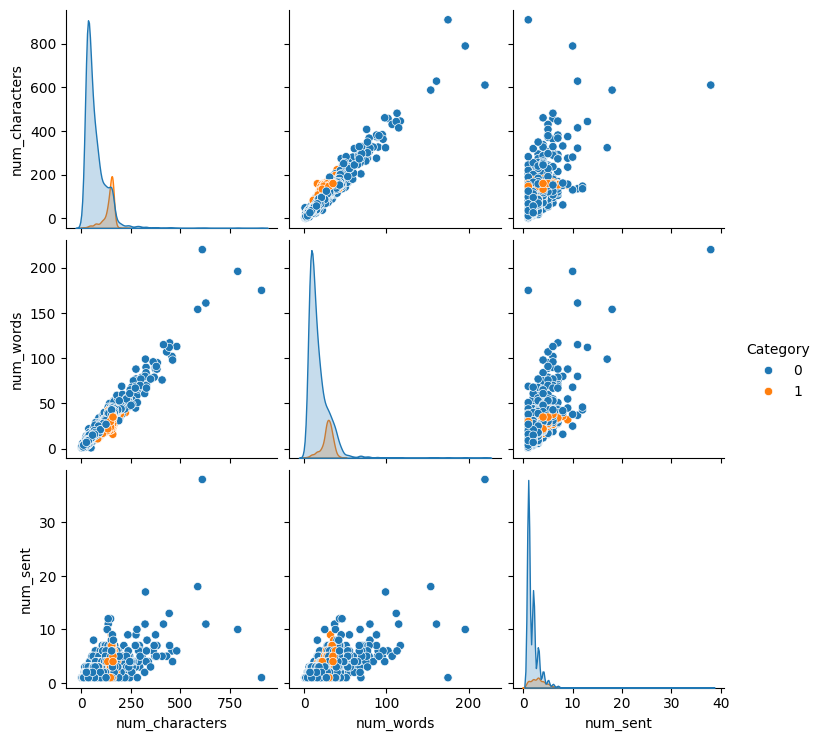

In [ ]:
sns.pairplot(df,hue='Category')

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
#lemmatization
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemma = nltk.WordNetLemmatizer()

In [ ]:
def preprocessing(text):
  #RLower casing the text
  text = text.lower()
  #Tokenizing the text
  text = nltk.word_tokenize(text)

  new_text =[]
  new_text = [word for word in text if word not in stop_words]
  new_text = [lemma.lemmatize(word) for word in new_text]
  new_text = ' '.join(new_text)



  return new_text

In [ ]:
preprocessing("I loved Thirdeye lectures. Do you like?")

'loved thirdeye lecture . like ?'

In [ ]:
df['Processed_text'] = df['Message'].apply(preprocessing)

In [ ]:
df.head()

,Category,Message,num_characters,num_words,num_sent,Processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go jurong point , crazy .. available bugis n g..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joking wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor ... u c already say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah n't think go usf , life around though"


In [ ]:
from wordcloud import WordCloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['Category']==1]['Message'].str.cat(sep=' '))

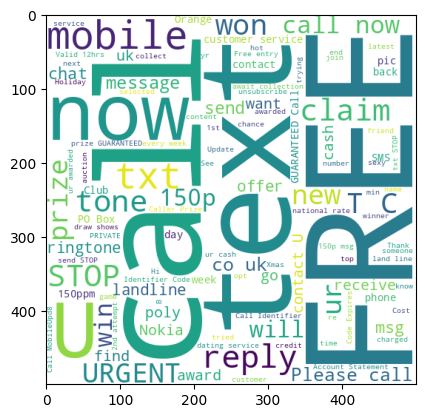

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['Category']==0]['Message'].str.cat(sep=' '))

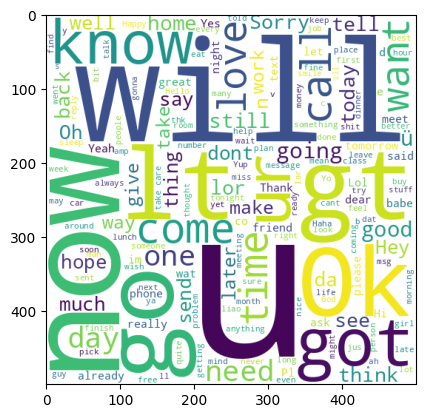

In [ ]:
plt.imshow(ham_wc)

In [ ]:
df.head()

,Category,Message,num_characters,num_words,num_sent,Processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go jurong point , crazy .. available bugis n g..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joking wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor ... u c already say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah n't think go usf , life around though"


#Model Building

In [ ]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess


In [ ]:
# Preprocess the messages (tokenization)
df['Processed_text'] = df['Message'].apply(lambda x: simple_preprocess(x))

In [ ]:
df.sample(2)

,Category,Message,num_characters,num_words,num_sent,Processed_text
5322,0,"Thanks, I'll keep that in mind",30,8,1,"[thanks, ll, keep, that, in, mind]"
3877,0,did u get that message,22,5,1,"[did, get, that, message]"


In [ ]:
# Train a Word2Vec model on the tokenized messages
wordvect_model = Word2Vec(sentences=df['Processed_text'], vector_size=100, window=5, min_count=1, workers=4)


In [ ]:
#How to show window
wordvect_model.wv.key_to_index


{'you': 0,
 'to': 1,
 'the': 2,
 'and': 3,
 'in': 4,
 'is': 5,
 'me': 6,
 'it': 7,
 'my': 8,
 'for': 9,
 'your': 10,
 'that': 11,
 'of': 12,
 'have': 13,
 'call': 14,
 'on': 15,
 'are': 16,
 'can': 17,
 'now': 18,
 'so': 19,
 'but': 20,
 'not': 21,
 'we': 22,
 'or': 23,
 'at': 24,
 'do': 25,
 'be': 26,
 'get': 27,
 'will': 28,
 'just': 29,
 'if': 30,
 'with': 31,
 'no': 32,
 'ur': 33,
 'this': 34,
 'up': 35,
 'how': 36,
 'gt': 37,
 'lt': 38,
 'go': 39,
 'when': 40,
 'what': 41,
 'from': 42,
 'ok': 43,
 'all': 44,
 'out': 45,
 'free': 46,
 'know': 47,
 'll': 48,
 'like': 49,
 'got': 50,
 'then': 51,
 'good': 52,
 'am': 53,
 'he': 54,
 'come': 55,
 'there': 56,
 'day': 57,
 'time': 58,
 'was': 59,
 'its': 60,
 'only': 61,
 'love': 62,
 'want': 63,
 'text': 64,
 'send': 65,
 'one': 66,
 'going': 67,
 'need': 68,
 'by': 69,
 'lor': 70,
 'home': 71,
 'as': 72,
 'don': 73,
 'about': 74,
 'txt': 75,
 'see': 76,
 'still': 77,
 'stop': 78,
 'back': 79,
 'she': 80,
 'today': 81,
 'da': 82,
 'don

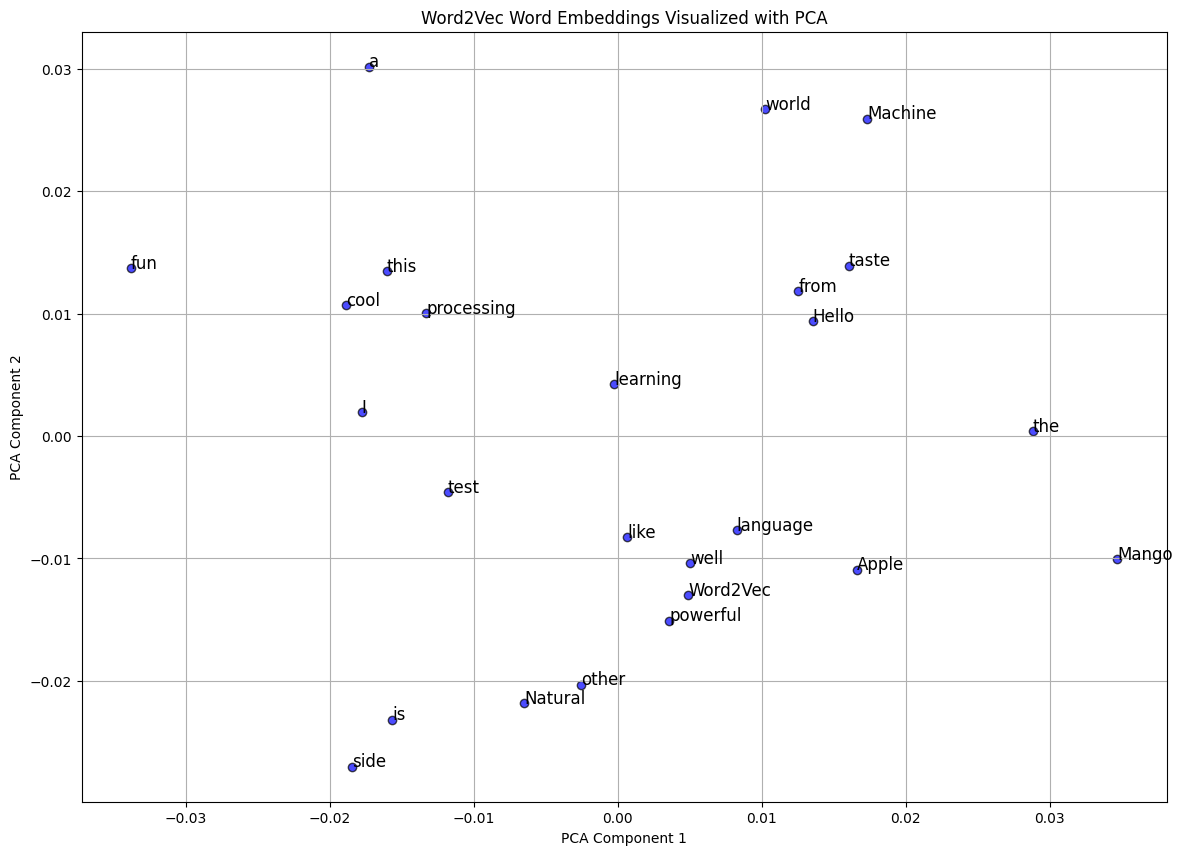

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample data
data = ["Hello world this is a test", "Word2Vec is cool", "Natural language processing is fun",
        "Hello from the other side", "Machine learning is powerful", "I like Apple","Mango taste well"]
df = pd.DataFrame(data, columns=["Processed_text"])
df['Processed_text'] = df['Processed_text'].apply(lambda x: x.split())

# Train Word2Vec model
wordvect_model = Word2Vec(sentences=df['Processed_text'], vector_size=100, window=5, min_count=1, workers=4)


import numpy as np

# Get words and their vectors
words = list(wordvect_model.wv.key_to_index.keys())
word_vectors = wordvect_model.wv[words]

# Reduce dimensions with PCA
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

# Plot
plt.figure(figsize=(14, 10))
plt.scatter(result[:, 0], result[:, 1], c='blue', edgecolors='k', alpha=0.7)

# Annotate words
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=12)

plt.title("Word2Vec Word Embeddings Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


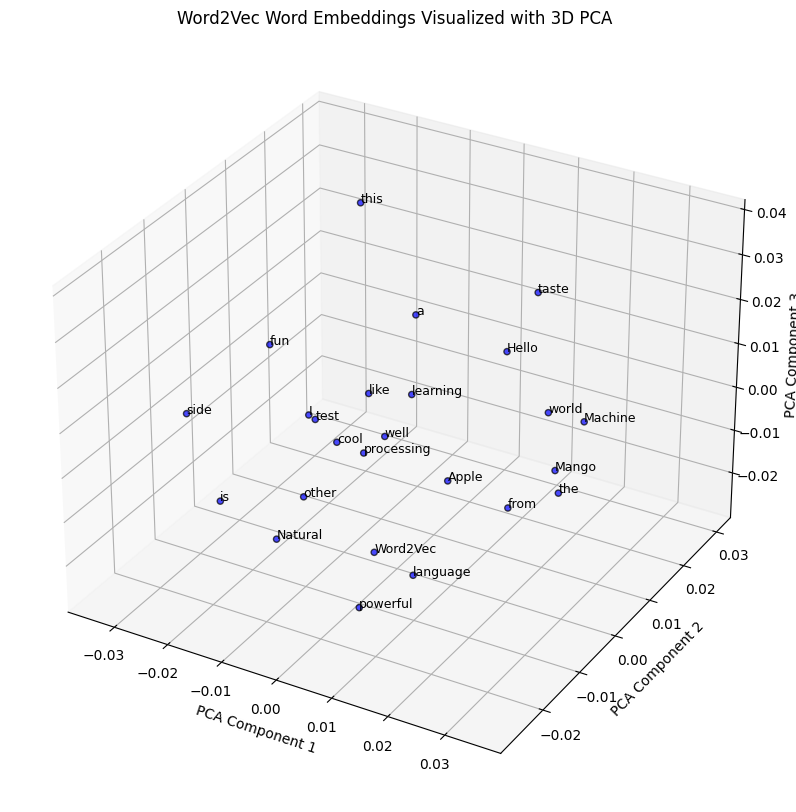

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Get words and their vectors
words = list(wordvect_model.wv.key_to_index.keys())
word_vectors = wordvect_model.wv[words]

# Reduce dimensions with PCA
pca = PCA(n_components=3)
result = pca.fit_transform(word_vectors)

# Plot in 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result[:, 0], result[:, 1], result[:, 2], c='blue', edgecolors='k', alpha=0.7)

# Annotate words
for i, word in enumerate(words[:50]):  # Limit to first 50 words for readability
    ax.text(result[i, 0], result[i, 1], result[i, 2], word, fontsize=9)

ax.set_title("Word2Vec Word Embeddings Visualized with 3D PCA")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
plt.show()


In [ ]:
df.head()

,Category,Message,num_characters,num_words,num_sent,Processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, until, jurong, point, crazy, available, o..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joking, wif, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, in, wkly, comp, to, win, fa, cup..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[dun, say, so, early, hor, already, then, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, don, think, he, goes, to, usf, he, lives..."


In [ ]:
def vectorize_message(tokens, model):
    # Filter out tokens not in the model's vocabulary
    tokens = [token for token in tokens if token in model.wv]
    if not tokens:
        return np.zeros(wordvect_model.vector_size)

    # Compute the average vector
    return np.mean([wordvect_model.wv[token] for token in tokens], axis=0)

# Apply the vectorization function to each message
df['vector'] = df['Processed_text'].apply(lambda tokens: vectorize_message(tokens, wordvect_model))

In [ ]:
# Convert the list of vectors into a NumPy array
vectors = np.vstack(df['vector'].to_numpy())

In [ ]:
#vocabulary size
len(wordvect_model.wv)

7738

In [ ]:
#vocabulary count
wordvect_model.wv.vectors.shape

(7738, 100)

In [ ]:
df.head()

,Category,Message,num_characters,num_words,num_sent,Processed_text,vector
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, until, jurong, point, crazy, available, o...","[-0.23324092, 0.32893786, 0.05447761, 0.098495..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joking, wif, oni]","[-0.16929328, 0.23723014, 0.037579603, 0.07003..."
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, in, wkly, comp, to, win, fa, cup...","[-0.2550146, 0.3703044, 0.06150333, 0.10726904..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[dun, say, so, early, hor, already, then, say]","[-0.31139055, 0.44682395, 0.079585776, 0.13389..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, don, think, he, goes, to, usf, he, lives...","[-0.29235432, 0.41148126, 0.07396097, 0.125677..."


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Now, you can split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(vectors, df['Category'], test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(4125, 100) (1032, 100)


In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_test,y_pred)

0.9563953488372093

In [ ]:
import pickle

with open("/content/drive/MyDrive/DataScience2024/NLP/Emailclassifier_model.pkl", "wb") as file:
    pickle.dump(rf, file)

In [ ]:
wordvect_model.save("/content/drive/MyDrive/DataScience2024/NLP/word2vec_model.model")

In [ ]:
import joblib

# Save the RandomForest model
joblib.dump(rf, "/content/drive/MyDrive/DataScience2024/NLP/classifier_model.joblib")

# Save the Word2Vec model
wordvect_model.save("/content/drive/MyDrive/DataScience2024/NLP/word2vec_modell.model")


In [ ]:
def preprocess_sentence(sentence):
    simple_preprocess(sentence)
    return simple_preprocess(sentence)

In [ ]:
def vectorize_sentence(tokens, wordvect_model):
    """Vectorize the sentence using the Word2Vec model."""
    tokens = [token for token in tokens if token in wordvect_model.wv]
    if not tokens:
        return np.zeros(wordvect_model.vector_size)
    return np.mean([wordvect_model.wv[token] for token in tokens], axis=0)

In [ ]:
def predict_sentence(sentence, wordvect_model, classifier):
    """Predict whether the input sentence is 'ham' or 'spam'."""
    tokens = preprocess_sentence(sentence)
    vector = vectorize_sentence(tokens, wordvect_model)
    prediction = classifier.predict([vector])
    return "spam" if prediction == 1 else "ham"

In [ ]:
# Load the trained classifier
with open("/content/drive/MyDrive/DataScience2024/NLP/classifier_model.pkl", "rb") as file:
    classifier = pickle.load(file)




In [ ]:
# Example sentence to test
new_sentence = "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...."
new_sent ="SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"
# Predict the class of the new sentence
result = predict_sentence(new_sent, wordvect_model, rf)
print(f"The sentence is classified as: {result}")

The sentence is classified as: spam
